Machine Learning Model Development
Task : Develop and deploy a machine learning model to solve a specific business problem.

Details:

Problem Definition: Identify a business problem that can be addressed with machine learning.
Data Collection: Gather and preprocess relevant data.
Model Selection: Choose and implement machine learning algorithms (e.g., classification, regression,
clustering).
Evaluation: Assess model performance using metrics like accuracy, precision, recall, and F1 score.
Deployment: Deploy the model into a production environment or integrate it with an application.
Where to Do It:
Jupyter Notebook: Develop and test machine learning models.
Google Colab: Use for developing models with cloud-based resources.
AWS SageMaker: Deploy and manage machine learning models on AWS.

# Defining fraud with model

In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

In [26]:
data=pd.read_csv('creditcard.csv')

In [3]:
# Filter rows where Class == 1.0
fraud_cases = data[data["Class"] == 1.0]

# Show first few rows
print(fraud_cases.head(20))

# Or see how many fraud cases there are
print(f"Number of fraud cases: {len(fraud_cases)}")
# Show all columns without truncation
pd.set_option('display.max_columns', None)
print(data.head())



      Time        V1        V2        V3        V4        V5        V6  \
541    406 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108  6986 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329  7519  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
6331  7526  0.008430  4.137837 -6.240697  6.675732  0.768307 -3.353060   
6334  7535  0.026779  4.132464 -6.560600  6.348557  1.329666 -2.513479   
6336  7543  0.329594  3.712889 -5.775935  6.078266  1.667359 -2.420168   
6338  7551  0.316459  3.809076 -5.615159  6.047445  1.554026 -2.651353   
6427  7610  0.725646  2.300894 -5.329976  4.007683 -1.730411 -1.732193   
6446  7672  0.702710  2.426433 -5.234513  4.416661 -2.170806 -2.667554   
6472  7740  1.023874  2.001485 -4.769752  3.819195 -1.271754 -1.734662   
6529  7891 -1.585505  3.261585 -4.1374

In [28]:
print(data.shape)

(284807, 31)


**Function quick overview**

In [29]:
def quick_overview(data):

    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = pd.to_numeric(data[col].str.replace(',','', regex=False), errors='ignore')

    print("===== SHAPE =====")
    print(data.shape)

    print("\n===== INFO =====")
    print(data.info())

    print("\n===== MISSING VALUES =====")
    print(data.isnull().sum())

    print("\n===== UNIQUE VALUES =====")
    print(data.nunique())

    print("\n=====Categorical columns=====")
    categorical_cols = data.select_dtypes(include='object').columns
    print(categorical_cols)

    print("\n=====Numeric columns======")
    numeric_cols = data.select_dtypes(include='number').columns
    print(numeric_cols)

    if len(numeric_cols) > 0:
        print("\n===== BASIC STATISTICS =====")
        print(data[numeric_cols].describe().T)

        print("\n===== MEDIAN =====")
        print(data[numeric_cols].median())

        print("\n===== QUANTILES =====")
        print(data[numeric_cols].quantile([0.25, 0.5, 0.75]))

    print("\n===== DUPLICATES =====")
    print(data.duplicated().sum())

    print("\n===== Describe =====")
    print(data.describe())

    print("\n===== COLUMNS =====")
    print(data.columns)

    return data

In [30]:
quick_overview(data)

===== SHAPE =====
(284807, 31)

===== INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [32]:
data.shape

(284807, 31)

In [33]:
data[["Class"]].value_counts()

,count
Class,
0,284315
1,492


In [34]:
data.duplicated().sum()

np.int64(1081)

In [35]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [38]:
X = data.drop('Class', axis=1)
y = data['Class']

Standart Scaler nd SMOTE

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit + transform only train
X_test_scaled = scaler.transform(X_test)         # only transform


In [74]:
import pickle
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [75]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_resample, y_train_resample = sm.fit_resample(X_train_scaled, y_train)

model.fit(X_train_resample, y_train_resample)


[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.169139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, n_estimators=300,
               n_jobs=-1, random_state=42, subsample=0.8)

In [76]:
#  Prediction original test (scaled)
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [77]:
print(pd.Series(y_train.value_counts(), name="Before SMOTE"))
print(pd.Series(y_train_resample.value_counts(), name="After SMOTE"))

Class
0    227451
1       394
Name: Before SMOTE, dtype: int64
Class
0    227451
1    227451
Name: After SMOTE, dtype: int64


In [78]:
print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_resample))

Before SMOTE: [227451    394]
After SMOTE: [227451 227451]


 Model — Random Forest, Xgboost , Lightgbm

In [55]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=200, random_state=42, n_jobs=-1
    ),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        use_label_encoder=False,
        eval_metric='logloss'
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=-1,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    )
}


results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train_resample, y_train_resample)

    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    auc = roc_auc_score(y_test, y_prob)
    print(f"ROC-AUC Score: {auc:.4f}")

    results[name] = auc


print("\n📊 Model ROC-AUC Comparison:")
for model, score in results.items():
    print(f"{model}: {score:.4f}")


🔹 Training Random Forest...

Confusion Matrix:
[[56855     9]
 [   22    76]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56864
           1     0.8941    0.7755    0.8306        98

    accuracy                         0.9995     56962
   macro avg     0.9469    0.8877    0.9152     56962
weighted avg     0.9994    0.9995    0.9994     56962

ROC-AUC Score: 0.9615

🔹 Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:15:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Confusion Matrix:
[[56724   140]
 [   17    81]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9975    0.9986     56864
           1     0.3665    0.8265    0.5078        98

    accuracy                         0.9972     56962
   macro avg     0.6831    0.9120    0.7532     56962
weighted avg     0.9986    0.9972    0.9978     56962

ROC-AUC Score: 0.9624

🔹 Training LightGBM...
[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.249302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Confusion Matrix:
[[56820    44]
 [   20    78]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9992    0.9994     56864
           1     0.6393    0.7959    0.7091        98

    accuracy                         0.9989     56962
   macro avg     0.8195    0.8976    0.8543     56962
weighted avg     0.9990    0.9989    0.9989     56962

ROC-AUC Score: 0.9623

📊 Model ROC-AUC Comparison:
Random Forest: 0.9615
XGBoost: 0.9624
LightGBM: 0.9623


Pickle

In [62]:
import pickle

for name, model in models.items():

    model.fit(X_train_resample, y_train_resample)


    filename = f"{name.replace(' ', '_').lower()}_model.pkl"
    with open(filename, "wb") as f:
        pickle.dump(model, f)
    print(f"{name} model saved as {filename} ")


Random Forest model saved as random_forest_model.pkl ✅


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:41:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model saved as xgboost_model.pkl ✅
[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.142334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM model saved as lightgbm_model.pkl ✅


ROC AUC CURVE

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


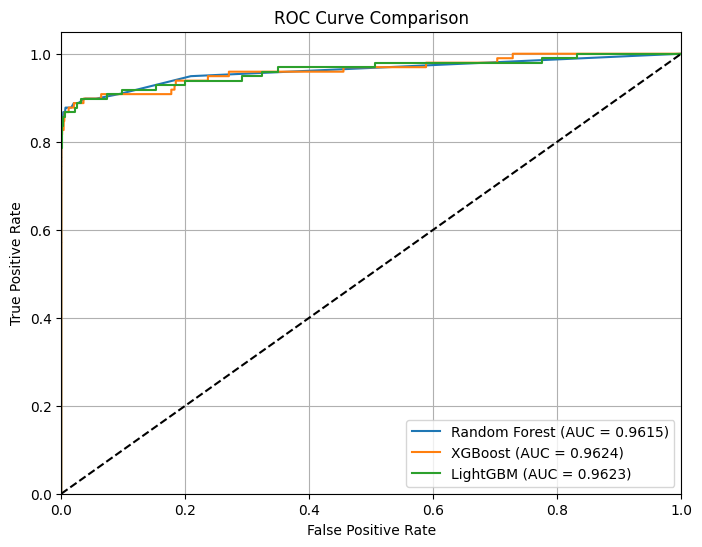

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

for name, model in models.items():
    # Pickle istifadə etmədən mövcud öyrədilmiş modeldən proqnoz
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.4f})")

plt.plot([0,1],[0,1],'k--')  # diagonal
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 0.1-dən 0.9-a qədər threshold-lar
thresholds = [0.1 * i for i in range(1, 10)]
for t in thresholds:
    y_pred_thresh = (models["XGBoost"].predict_proba(X_test_scaled)[:,1] >= t).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    print(f"Threshold: {t:.1f} -> Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")


Threshold: 0.1 -> Precision: 0.0837, Recall: 0.8776, F1: 0.1528
Threshold: 0.2 -> Precision: 0.1481, Recall: 0.8673, F1: 0.2530
Threshold: 0.3 -> Precision: 0.2171, Recall: 0.8571, F1: 0.3464
Threshold: 0.4 -> Precision: 0.2765, Recall: 0.8265, F1: 0.4143
Threshold: 0.5 -> Precision: 0.3665, Recall: 0.8265, F1: 0.5078
Threshold: 0.6 -> Precision: 0.4525, Recall: 0.8265, F1: 0.5848
Threshold: 0.7 -> Precision: 0.5405, Recall: 0.8163, F1: 0.6504
Threshold: 0.8 -> Precision: 0.6612, Recall: 0.8163, F1: 0.7306
Threshold: 0.9 -> Precision: 0.7980, Recall: 0.8061, F1: 0.8020


In [65]:
from sklearn.metrics import confusion_matrix, classification_report

optimal_threshold = 0.7

# Predict proba ilə yeni threshold tətbiq et
y_prob = models["XGBoost"].predict_proba(X_test_scaled)[:, 1]
y_pred_opt = (y_prob >= optimal_threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_opt)
print("Confusion Matrix at threshold 0.7:")
print(cm)


cr = classification_report(y_test, y_pred_opt, digits=4)
print("\nClassification Report at threshold 0.7:")
print(cr)


Confusion Matrix at threshold 0.7:
[[56796    68]
 [   18    80]]

Classification Report at threshold 0.7:
              precision    recall  f1-score   support

           0     0.9997    0.9988    0.9992     56864
           1     0.5405    0.8163    0.6504        98

    accuracy                         0.9985     56962
   macro avg     0.7701    0.9076    0.8248     56962
weighted avg     0.9989    0.9985    0.9986     56962



In [66]:

from sklearn.metrics import f1_score

y_prob = models["XGBoost"].predict_proba(X_test_scaled)[:, 1]

thresholds = np.arange(0.1, 0.91, 0.01)
f1_scores = []

for t in thresholds:
    y_pred = (y_prob >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred))

# Maksimum F1 olan threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Optimal threshold: {best_threshold:.2f} -> F1-score: {best_f1:.4f}")


Optimal threshold: 0.90 -> F1-score: 0.8020


In [67]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_opt = (y_prob >= best_threshold).astype(int)

print("Confusion Matrix at optimal threshold:")
print(confusion_matrix(y_test, y_pred_opt))

print("\nClassification Report at optimal threshold:")
print(classification_report(y_test, y_pred_opt, digits=4))


Confusion Matrix at optimal threshold:
[[56844    20]
 [   19    79]]

Classification Report at optimal threshold:
              precision    recall  f1-score   support

           0     0.9997    0.9996    0.9997     56864
           1     0.7980    0.8061    0.8020        98

    accuracy                         0.9993     56962
   macro avg     0.8988    0.9029    0.9008     56962
weighted avg     0.9993    0.9993    0.9993     56962



In [68]:
import pickle

xgb_package = {
    "model": models["XGBoost"],
    "threshold": 0.90
}

with open("xgboost_optimal_model.pkl", "wb") as f:
    pickle.dump(xgb_package, f)

print("XGBoost model + optimal threshold saved as 'xgboost_optimal_model.pkl'")


XGBoost model + optimal threshold saved as 'xgboost_optimal_model.pkl'


In [69]:

from sklearn.metrics import f1_score
import pickle

for name in ["Random Forest", "LightGBM"]:
    model = models[name]
    y_prob = model.predict_proba(X_test_scaled)[:, 1]


    thresholds = np.arange(0.1, 0.91, 0.01)
    f1_scores = [f1_score(y_test, (y_prob >= t).astype(int)) for t in thresholds]
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]
    best_f1 = f1_scores[best_idx]

    print(f"{name}: Optimal threshold = {best_threshold:.2f}, F1 = {best_f1:.4f}")

    y_pred_opt = (y_prob >= best_threshold).astype(int)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_opt))
    print("Classification Report:\n", classification_report(y_test, y_pred_opt, digits=4))

    package = {"model": model, "threshold": best_threshold}
    filename = f"{name.replace(' ', '_').lower()}_optimal_model.pkl"
    with open(filename, "wb") as f:
        pickle.dump(package, f)
    print(f"{name} model + optimal threshold saved as '{filename}'\n")


Random Forest: Optimal threshold = 0.48, F1 = 0.8370
Confusion Matrix:
 [[56855     9]
 [   21    77]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56864
           1     0.8953    0.7857    0.8370        98

    accuracy                         0.9995     56962
   macro avg     0.9475    0.8928    0.9183     56962
weighted avg     0.9995    0.9995    0.9995     56962

Random Forest model + optimal threshold saved as 'random_forest_optimal_model.pkl'



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM: Optimal threshold = 0.90, F1 = 0.8324
Confusion Matrix:
 [[56854    10]
 [   21    77]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56864
           1     0.8851    0.7857    0.8324        98

    accuracy                         0.9995     56962
   macro avg     0.9423    0.8928    0.9161     56962
weighted avg     0.9994    0.9995    0.9994     56962

LightGBM model + optimal threshold saved as 'lightgbm_optimal_model.pkl'



Interaktiv Streamlit App

In [71]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.4 MB/s eta 0:00:00


In [80]:

sample_data = data.groupby("Class", group_keys=False).apply(
    lambda x: x.sample(frac=0.1, random_state=42)
)

sample_data.to_csv("sample_with_class.csv", index=False)


sample_no_class_data = sample_data.drop(columns=["Class"])
sample_no_class_data.to_csv("sample_no_class.csv", index=False)

print(sample_data["Class"].value_counts())


/tmp/ipython-input-236079815.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_data = data.groupby("Class", group_keys=False).apply(


Class
0    28432
1       49
Name: count, dtype: int64
